<center>
<h1>Факультет "Прикладная математика" МАИ</h1>
<h2>Курс "Основы Python для анализа данных"</h2>
<h2>Артамонов Игорь Михайлович</h2>
</center>

<center><h2>Занятие № 11. Линейная регрессия. Логистическая регрессия. Kernel trick.</h2></center>

## Общение / вопросы по курсу

Платформа для групповой работы Atlassian Confluence факультета "Прикладная математика"

https://mai.moscow/display/PYTML

* <b>Занятие № 12. Линейная регрессия. Логистическая регрессия. Многослойный перцептрон.</b>

## virtualenv + Jupyter notebook

```
<Ctrl> + <Alt> + T - новое окно терминала
```

```
$ conda -V

$ conda update conda

$ conda search "^python$"

$ conda create -n yourenvname python=x.x anaconda

$ source activate yourenvname

$ jupyter notebook

$ conda install -n yourenvname [package]
```

##   Линейная регрессия. Логистическая регрессия. Многослойный перцептрон.</h2></center>

#### Задачи машинного обучения
* регрессия
* классификация

#### Обычный порядок действий
* получить "сырые" данные
* понять, что они из себя представляют (см. EDA)
* привести их в вид, пригодный для обучения модели
* разбить тренировочную выборку на две: обучающую и проверочную (валидационную)
* сравнить несколько алгоритмов машинного обучения, их настроек, чтобы получить наилучший результат для P на валидационной выборке
* (_возможно_) повторить предыдущие три этапа несколько раз
* обучить "лучшую" модель на всей тренировочной выборке
* использовать модель для получения каких-то результатов
* (_возможно_) провести дообучение модели с полученными свежими данными

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from numpy.random import randn
import seaborn as sns
from scipy import stats

import matplotlib as mpl
from matplotlib.patches import Ellipse
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
from sklearn.model_selection import KFold, train_test_split, GridSearchCV, cross_val_score

from sklearn.metrics import accuracy_score 

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [3]:
import os
import os.path

## Линейная регрессия

Регрессионная модель
$$
y = f(x, w) + \epsilon, E(\epsilon) = 0
$$<br>
где $f(x, w)$ - функция регрессии, $w$ - параметры модели, $\epsilon$ - случайная ошибка модели, называется линейной регрессией в том случае, если  
функция регрессии имеет следующий вид:
$$
y = w_0 + \sum_{i=1}^{m} {w_i x_i}
$$<br>
где $w_i$ - коэффициенты (веса) регрессии, $x_i$ - факторы модели, $m$ - количество факторов модели.

Параметры линейной регрессии показывают скорость изменения зависимой перменной по данному фактору при фиксированных остальных факторах:
$$
\forall i,  w_i = \frac{\partial f}{\partial x_i} = const
$$<br>

Для упрощения добавим фиктивную размерность $x_0 = 1$ для каждого наблюдения, то тогда можно внести свободный член $w_0$ под сумму:
$$
y = \sum_{i=0}^{m} {w_i x_i}
$$<br>
Или в векторном виде:
$$
\overrightarrow{y} = X \overrightarrow{w} + \epsilon 
$$<br>


 Функция потерь используется для определения расхождения между предсказанным значением $\hat{y}$ и реальными данными $y$. Это должно быть положительное значение, уменьшающееся в случае улучшения качества модели и увеличивающееся - в противном случае.
$$
\theta^* = arg min ()
$$

Среднеквадратичная ошибка (MSE - Mean Squared Error)
$$
\mathcal{L} = \frac{1}{n} \sum_{i=1}^n{ (y^{(i)}-\hat{y}^{(i)})^2}
$$
Она может быть минимизированя с использованием метода наименьших квадратов (МНК), который минимизирует среднеквадратичную ошибку между реальным значением и прогнозом, выданным моделью:
$$
\mathcal{L}(X, \overrightarrow{y},  \overrightarrow{w}) = 
    \frac{1}{2n} \sum_{i=1}^n{ (y_i - \overrightarrow{w}^\intercal \overrightarrow{x}_i)^2}
$$
<br><br>
Теорема Маркова-Гаусса утверждает, что оценка МНК является лучшей (то есть обладающей наименьшей дисперсией) оценкой параметров модели, среди всех линейных и несмещенных оценок.

## Градиентный спуск

<img src="images/fff.png" >

$$
\theta_j = \theta_j - \alpha \frac{1}{n} \sum_{i=0}^{n} ({h_\theta (x^{(i)}) - y^{(i)}})x_j^{(i)}
$$<br>

In [4]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

<b>CRIM</b>: Per capita crime rate by town<br>
<b>ZN</b>: Proportion of residential land zoned for lots over 25,000 sq. ft<br>
<b>INDUS</b>: Proportion of non-retail business acres per town<br>
<b>CHAS</b>: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)<br>
<b>NOX</b>: Nitric oxide concentration (parts per 10 million)<br>
<b>RM</b>: Average number of rooms per dwelling<br>
<b>AGE</b>: Proportion of owner-occupied units built prior to 1940<br>
<b>DIS</b>: Weighted distances to five Boston employment centers<br>
<b>RAD</b>: Index of accessibility to radial highways<br>
<b>TAX</b>: Full-value property tax rate per \$10,000<br>
<b>PTRATIO</b>: Pupil-teacher ratio by town<br>
<b>B</b>: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town<br>
<b>LSTAT</b>: Percentage of lower status of the population<br>
<b>MEDV</b>: Median value of owner-occupied homes in $1000s<br>

Целевая переменная - <b>MEDV</b>

In [5]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
X = boston.copy()

boston['MEDV'] = boston_dataset.target
y = boston['MEDV'].copy()

In [6]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [7]:
# Проверяем, что данные не содержат пустых строк 
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

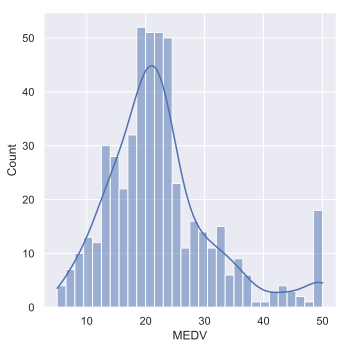

In [8]:
sns.set(rc={'figure.figsize':(12,8)})
g = sns.displot(data=y, bins=30, kde=True);

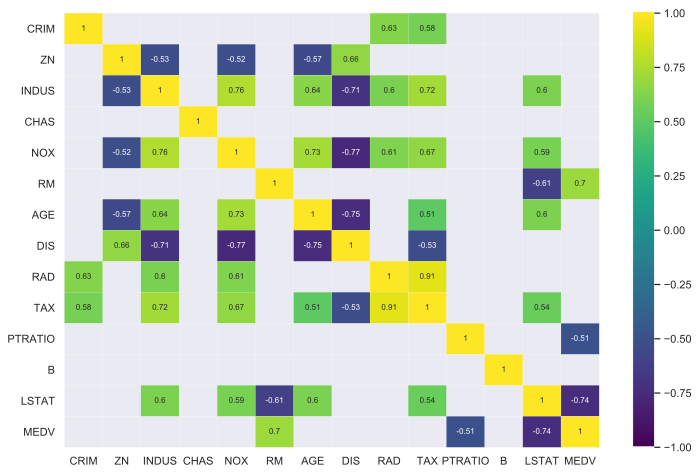

In [9]:
corrmat = boston.corr()
sns.heatmap(corrmat[(corrmat >= 0.5) | (corrmat < -0.5)], 
            cmap='viridis',
            vmax=1.0, vmin=-1.0,
            linewidth=0.1,
            annot=True,
            annot_kws={"size":8});

In [10]:
features = ['LSTAT', 'RM']

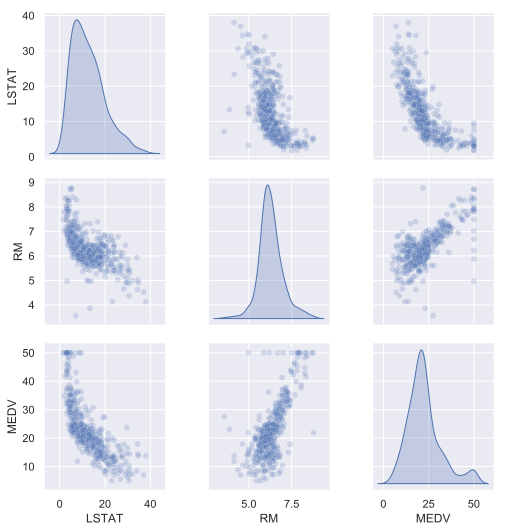

In [11]:
sns.pairplot(boston[['LSTAT', 'RM', 'MEDV']], diag_kind='kde', plot_kws={'alpha': 0.2});

In [69]:
num_epoch = 10
num_data = X.shape[0]
learning_rate = 0.01

w = np.random.uniform(low=-1.0, high=1.0, size=13)
b = np.random.uniform(low=-1.0, high=1.0)

for epoch in range(num_epoch):
    predict = X.dot(w) + b
    error = np.abs(predict - y).mean()

    # Assume that error < 5 will be enough
    if error < 5:
        break

    if epoch % 1000 == 0:    
        print("{0} epoch, error={1}".format(epoch, error))

    w = w - learning_rate * (predict-y).dot(X) / num_data
    b = b - learning_rate * (predict-y).mean()
    
print("{0} epoch, error={1}".format(epoch, error))


0 epoch, error=227.93094565006817
9 epoch, error=6.86859993158687e+33


### Стохастический градиентный спуск

<b>Стандартный градиентный спуск</b> (<i>Gradient descent</i>)<br><br>
$$
\Theta = \Theta - \eta \cdot \nabla_{\Theta} J(\Theta; x^{(i)}; y^{(i)})
$$<br><br>

<b>Пакетный</b> (<i>Mini-batch gradient descent</i>)<br><br>
$$
\Theta = \Theta - \eta \cdot \nabla_{\Theta} J(\Theta; x^{(i:i+k)}; y^{(i:i+k)})
$$<br><br>

<b>Градиентный спуск с моментом</b> (<i>Momentum</i>)<br><br>
$$
v_t = \gamma v_{t-1} + \eta \cdot \nabla_{\Theta} J(\Theta)
$$<br>
$$
\Theta = \Theta - v_t
$$<br>
$$
\gamma < 1
$$<br><br>


<img src="images/PM_Y687HvA.png" >

<b>Метод Нестерова</b> (<i>Nesterov / Nesterov momentum</i>)<br><br>

$$
v_t = \gamma v_{t-1} + \eta \cdot \nabla_{\Theta} J(\Theta - \gamma v_{t-1})
$$<br>
$$
\Theta = \Theta - v_t
$$<br>
$$
\gamma < 1
$$<br><br>

<b>Adagrad</b> (<i>"Adaptive" gradient</i>)<br><br>
$$
g_{t,i} =  \nabla_{\Theta} J(\Theta_{t,i})
$$<br><br>
$$
\Theta_{t+1,i} = \Theta_{t,i} - \eta \cdot g_{t,i} 
$$<br><br>
$$
\Theta_{t+1,i} = \Theta_{t,i} - \frac{\eta}{\sqrt (G_{t,ii} + \epsilon)} \cdot g_{t,i} 
$$<br><br>
$G_t \in \mathbb{R}^{d \times d}$ - диагональная матрица, в которой каждый элемент на диагонали $i,i$ - сумма квадратов градиентов по отношению к $\Theta_i$


<img src="images/grad1.png" >

In [13]:
# Пользуясь предыдущим кодом, реализуйте случайный градиентный спуск
def stoch_grad_descent(X, y, theta, alpha, niters, batch_size, cost_func):
    
    pass

In [14]:
# Сравните Ваш SGD с реализацией  sklearn


### Линейная регрессия - sklearn

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y)
pred = lr.predict(X)

In [16]:
lr.score(X, y)

0.7406426641094095

In [17]:
lr.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [18]:
lr.intercept_ 

36.4594883850899

In [19]:
type(pred)

numpy.ndarray

In [20]:
# Выведите графики: реальный и предсказанный для двух переменных с наибольшей корреляцией с целевым значением


## Kernel trick

<img src="images/idea.png">

Минимизируем
$$
\Theta(\alpha) = - \sum_{i=1}^n + \frac{1}{2}\sum_{i=1}^n\sum_{j=1}^n y_i y_j \alpha_{i}\alpha_{j} x_i x_j
$$
При ограничении:
$$
\sum_{\frac{i=1}{0 \le \alpha_i \le C}}^n y_i \alpha_i = 0
$$


## Логистическая регрессия

В отличие от __линейной__ регрессии, __логистическая__ регрессия используется для __классификации__

В основе логистической регрессии лежит переход от линейного прогноза к вероятности. Иначе говоря, нам нужна функция
$$
f:R\rightarrow[0,1]
$$<br>
$$
p = \sigma( \overrightarrow{w}^\intercal \overrightarrow{x} )
$$


В случае классификации "идеальная" функция нейрона должна выглядеть так:

<img src="images/1200px-Heaviside.svg.png">

### <font color="green">ВОПРОС</font>
В чем может быть проблема такой функции, если она окажется в узле?

$\sigma$-функция:
$$
\sigma(x) = \frac {1} {1+e^{-x}}
$$
Производная $\sigma$ функции: 
$$
\sigma'(x) = \sigma(x) \cdot (1-\sigma(x))
$$

Логистическая функция потерь


$$
\mathcal{L}_{log}(X, \overrightarrow{y}, \overrightarrow{w}) = \sum_{i=1}^n 
    {( 1 + e^{-y_i \overrightarrow{w}^\intercal \overrightarrow{x_i}}  )}
$$


Кросс-энтропия

$$
\mathcal{L} = - \frac{1}{n} \sum_{i=1}^n{[
    (y^{(i)}log \hat{y}^{(i)})-(1-y^{(i)})log(1- \hat{y}^{(i)})]}
$$


## Регуляризация параметров

Ситуации, когда матрица $X^\intercal X$ «близка» к вырожденной, встречается достаточно часто. В этом случае говорят о наличии <i>мультиколлинеарности</i>, то есть наличии линейной зависимости между объясняющими переменными (факторами) регрессионной модели. <br><br> При этом выделяют два варианта:
* <i>полная коллинеарность</i>,  которая означает наличие функциональной линейной зависимости.<br>
В этм случае возникает неопределенность параметров в линейной регрессионной модели.
* частичная (или просто _мультиколлинеарность_)  наличие сильной корреляции между факторами. 
В таких ситуациях МНК-оценка формально существуют, но обладают «плохими» статистическими свойствами. Небольшое изменение исходных статистических данных (добавление или изъятие небольшой порции наблюдений) приводит к существенному изменению оценок коэффициентов регрессионной модели, вплоть до изменения их знаков.


### Гребневая регрессия (Ridge resression)

$$
\overrightarrow{w} = (X^\intercal X + \lambda E)^{-1} X^\intercal \overrightarrow y
$$

### LASSO-регрессия

$$
J(X, \overrightarrow{y}, \overrightarrow{w} ) = \mathcal{L}_{log}(X, \overrightarrow{y}, \overrightarrow{w}) + \lambda {| \overrightarrow{w} |} ^2
$$

<img src="images/ridge-and-lasso.png" width=500>

## <font color="red">ЗАДАНИЕ</font>

### <font color="blue">ВАЖНО!</font> Это задание необходимо сделать _всем_ 

In [1]:
# Загрузите данные CIFAR-10
# https://www.cs.toronto.edu/~kriz/cifar.html

import os

In [12]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

data = unpickle(os.path.join("cifar", "data_batch_1"))
test_data = unpickle(os.path.join("cifar", "test_batch"))

In [3]:
from sklearn.cluster import KMeans, SpectralClustering, DBSCAN, AgglomerativeClustering
import numpy as np
from sklearn import metrics

Кластеризуйте изображения на 10 групп c использованием методов, описанных ранее (естественно, 
без использования целевой переменной)

In [4]:
# Ваш код
n_clusters = 10

n_samples = 500
train = data[b'data'][:n_samples]
target = data[b'labels'][:n_samples]

predicted = [('kmeans', KMeans(n_clusters=10).fit_predict(train)),
             ('spectral', SpectralClustering(n_clusters=10).fit_predict(train)),
             ('dbscan', DBSCAN().fit_predict(train)),
             ('agglomerative', AgglomerativeClustering(n_clusters=10).fit_predict(train))]

c:\users\pkmixer\.pycharm2017.3\enviroment\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Зная значение целевой переменной, сравните качество кластеризации

In [5]:
# Ваш код
import pandas as pd
cur_metrics = []
algos = []
for algo, pred in predicted:
    cur_metrics.append({'ARI': metrics.adjusted_rand_score(target, pred),
                 'AMI': metrics.adjusted_mutual_info_score(target, pred),
                 'Homogenity': metrics.homogeneity_score(target, pred),
                 'Completeness': metrics.completeness_score(target, pred),
                 'V-measure': metrics.v_measure_score(target, pred)})
    algos.append(algo)
    
cluster_metrics = pd.DataFrame(data=cur_metrics,
                               columns=['ARI', 'AMI', 'Homogenity', 'Completeness', 'V-measure'],
                               index=algos)
cluster_metrics

c:\users\pkmixer\.pycharm2017.3\enviroment\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


,ARI,AMI,Homogenity,Completeness,V-measure
kmeans,0.042271,9.445824e-02,1.285671e-01,0.131068,1.298057e-01
spectral,-0.002493,-5.087978e-03,2.942091e-02,0.041871,3.455873e-02
dbscan,0.000000,-2.059061e-16,-1.331081e-16,1.000000,-2.662162e-16
agglomerative,0.037328,1.002739e-01,1.345015e-01,0.140759,1.375589e-01


Предсказажите класс с помощью линейной регрессии<br>
Подумайте, как Вы будете разделять разные классы

In [28]:
# Ваш код
from sklearn import linear_model

n_test = 100
test_target = test_data[b'labels'][:n_test]
test = test_data[b'data'][:n_test]

linear = linear_model.LinearRegression().fit(train, target)
pred = linear.predict(test).astype(np.int8)
metrics.precision_score(test_target, pred, average='micro')

0.09

Попробуйте предсказать класс с помощью:
    * логистической регрессии
    * гребневой регрессии
    * LASSO-регрессии<br><br>
Ответьте на вопросы:
    * Сколько времени заняло выполнение? 
    * Какой метод самый быстрый, а какой - самый медленный? Почему?

In [29]:
# Ваш код
import time

models = [linear_model.LogisticRegression(), linear_model.RidgeClassifier(), linear_model.Lasso()]
model_names = 'logistic', 'ridge', 'lasso' 

for name, clf in zip(model_names, models):
    start = time.time()
    
    clf = clf.fit(train, target)
    pred = clf.predict(test).astype(np.int8)
    
    
    end = time.time()
    print("{}: time = {}, precision = {}".format(name, end - start,
                                                metrics.precision_score(test_target, pred, average='micro')))

c:\users\pkmixer\.pycharm2017.3\enviroment\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\pkmixer\.pycharm2017.3\enviroment\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


logistic: time = 6.047339916229248, precision = 0.27
ridge: time = 0.03511524200439453, precision = 0.21
lasso: time = 1.7110023498535156, precision = 0.1


c:\users\pkmixer\.pycharm2017.3\enviroment\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Ответьте на вопросы:
    * Сколько времени заняло выполнение? =>
        ridge < lasso < logistic
    * Какой метод самый быстрый, а какой - самый медленный? Почему? =>
        В методах гребневой и лассо регрессий используется регуляризация, которая накладывает более жёсткие условия на 
        минимизируемую функцию. В методе гребневой регрессии для минимизации применяется покординатный спуск, что может 
        ускорить схождение к минимуму.

Посмотрите, какие параметры можно варьировать для:
    * логистической регрессии
    * гребневой регрессии
    * LASSO-регрессии<br>

С использованием классов с приставкой __CV__ (linear_model.LassoCV и т.д) найдите лучшие варианты и снова сравните их.

In [37]:
## Ваш код

models = [linear_model.LogisticRegressionCV(cv=3, max_iter=1000), linear_model.RidgeClassifierCV(cv=3), linear_model.LassoCV(n_alphas=3, cv=3)]
model_names = 'logisticCV', 'ridgeCV', 'lassoCV' 

for name, clf in zip(model_names, models):
    start = time.time()
    
    clf = clf.fit(train, target)
    pred = clf.predict(test).astype(np.int8)
    
    
    end = time.time()
    print("{}: time = {}, precision = {}".format(name, end - start,
                                                metrics.precision_score(test_target, pred, average='micro')))

c:\users\pkmixer\.pycharm2017.3\enviroment\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


logisticCV: time = 34.656148195266724, precision = 0.29
ridgeCV: time = 0.25941944122314453, precision = 0.21


c:\users\pkmixer\.pycharm2017.3\enviroment\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\pkmixer\.pycharm2017.3\enviroment\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\pkmixer\.pycharm2017.3\enviroment\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


lassoCV: time = 9.892540216445923, precision = 0.07


## Экзаменационные вопросы:

* Линейная регрессия
* Логистическая регрессия
* Регуляризация. Гребневая (ridge) и LASSO-регрессее
* Структура нейрона в нейросети
* Многослойный перцептрон (MLP) 
* Прямое распространение в логистической регрессии
* Обратное распространение в логистической регрессии